In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# create dataframe 
filename = "officialmay9.CSV"
df_og = pd.read_csv(filename)
print(df_og)

        Time(ms)  Distance(cm)  Sound     AX   AY    AZ
0            128        169.08  40000      0    0     0
1            229        169.25  40000  16260   36 -1596
2            330        169.97  40000  16208   68 -1688
3            431        169.95  40000  16236   48 -1856
4            532        168.81  40000  16296   48 -1928
...          ...           ...    ...    ...  ...   ...
192325  18367749        169.66  40000  16280  -28 -2024
192326  18367850        169.64  40000  16204  -64 -1936
192327  18367951        167.96  40000  16172  -80 -2048
192328  18368052        168.40  40000  16192 -120 -2004
192329  18368154        169.66  39821  16328    8 -2120

[192330 rows x 6 columns]


In [3]:
# eliminate all weird distance data"
df = df_og.copy()
for row in range(len(df)):
    if df.loc[row,"Distance(cm)"] > 170:  # since the hallway is only 170cm wide, eliminate all data bigger than 170
        df.loc[row,"Distance(cm)"] = 170


In [4]:
# add a column for the clock
from datetime import datetime, timedelta


def display_current_time(elapsed_ms):
    # define the start time: 8:16 AM
    elapsed_ms = int(elapsed_ms)
    start_time = datetime.combine(datetime.today(), datetime.strptime("08:16:00", "%H:%M:%S").time())
    
    # convert milliseconds to timedelta
    elapsed = timedelta(milliseconds=elapsed_ms)
    
    # add elapsed time to start time
    current_time = start_time + elapsed

    # format and return in AM/PM format
    return current_time.strftime("%I:%M:%S %p")

for row in range(len(df)):
    df.loc[row,"clock"] = display_current_time(df.loc[row,"Time(ms)"])
   
print(df)


        Time(ms)  Distance(cm)  Sound     AX   AY    AZ        clock
0            128        169.08  40000      0    0     0  08:16:00 AM
1            229        169.25  40000  16260   36 -1596  08:16:00 AM
2            330        169.97  40000  16208   68 -1688  08:16:00 AM
3            431        169.95  40000  16236   48 -1856  08:16:00 AM
4            532        168.81  40000  16296   48 -1928  08:16:00 AM
...          ...           ...    ...    ...  ...   ...          ...
192325  18367749        169.66  40000  16280  -28 -2024  01:22:07 PM
192326  18367850        169.64  40000  16204  -64 -1936  01:22:07 PM
192327  18367951        167.96  40000  16172  -80 -2048  01:22:07 PM
192328  18368052        168.40  40000  16192 -120 -2004  01:22:08 PM
192329  18368154        169.66  39821  16328    8 -2120  01:22:08 PM

[192330 rows x 7 columns]


<Axes: xlabel='Time(ms)'>

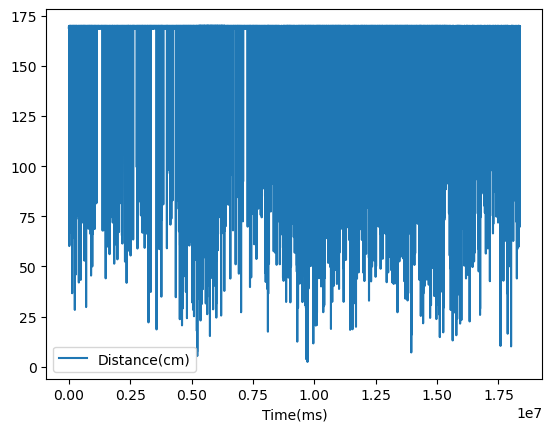

In [5]:
# plot raw data for distance
df.plot(x = 'Time(ms)', y = 'Distance(cm)')

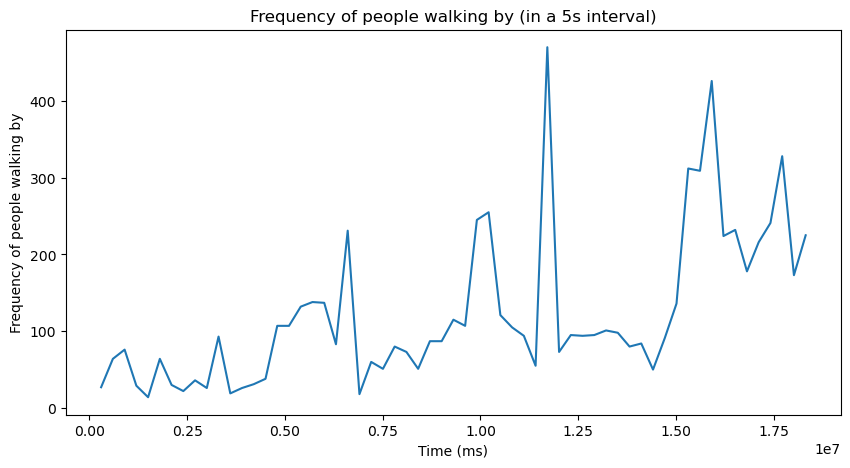

In [6]:
# graph the frequency of people walking by (i.e., how many times the distance measured is smaller than the width of the hallway)
import pandas as pd

count_dist = []
time_list = []
start_index = 0
start_time = df.loc[start_index, "Time(ms)"]

# convert the "Time(ms)" column to a numpy array (for speed)
times = df["Time(ms)"].values
distances = df["Distance(cm)"].values

# count how many times the distance is smaller than the width of the hallway (170cm), in a given interval
for row in range(len(df)):
    end_time = times[row]
    
    if end_time - start_time > 300000:  # time interval (in ms): 5 seconds
        window_dist = distances[start_index:row+1]
        counter = (window_dist < 168).sum()
        count_dist.append(counter)
        time_list.append(end_time)
        
        start_index = row+2
        start_time = times[start_index]
        

plt.figure(figsize=(10, 5))  # adjust size of graph
plt.plot(time_list,count_dist)

# add labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Frequency of people walking by")
plt.title("Frequency of people walking by (in a 5s interval)")

plt.show()

0           0
1           0
2           0
3           0
4           0
         ... 
192325      0
192326      0
192327      0
192328      0
192329    179
Name: Sound, Length: 192330, dtype: int64


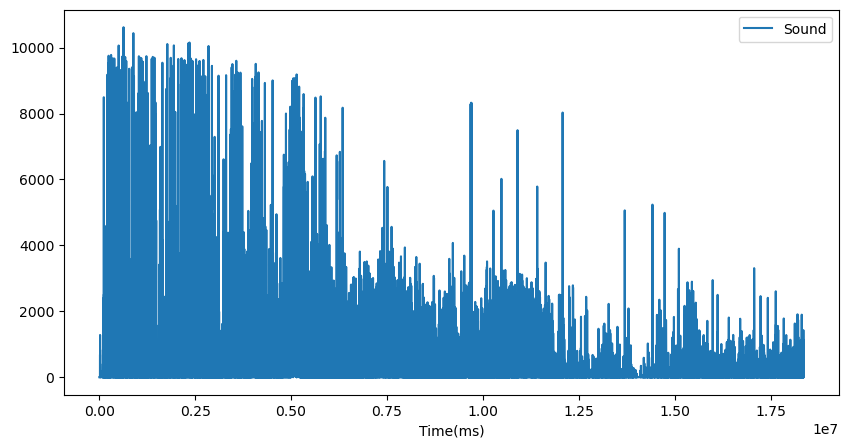

In [7]:
# format sound properly:
for row in range(len(df)):
    df.loc[row,"Sound"] = 40000 - df.loc[row, "Sound"]  # get relative sound value 

# plot raw sound data
df.plot(x = 'Time(ms)', y = 'Sound',figsize=(10, 5))
print(df["Sound"])

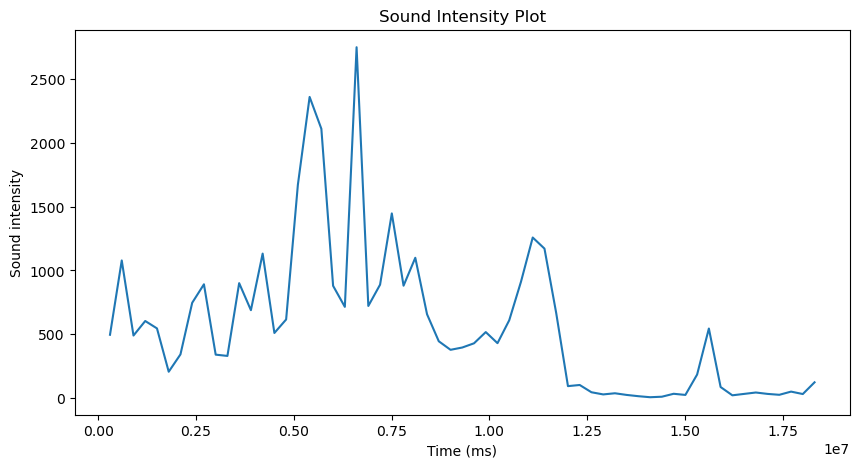

In [8]:
# make a graph of the sound intensity
# count how many times the sound intensity is bigger than a threshold value (500)

count_sound = []
time_list = []
start_index = 0
start_time = df.loc[start_index, "Sound"]

# convert the "Time(ms)" column to a numpy array
sound_values = df["Sound"].values

# count how many tim
for row in range(len(df)):
    end_time = times[row]
    
    if end_time - start_time > 300000:    # time interval: 5 seconds   
        window_sound = sound_values[start_index:row+1]
        counter = (window_sound > 500).sum()    # threshold sound intensity value
        count_sound.append(counter)
        time_list.append(end_time)
        
        start_index = row+2
        start_time = times[start_index]
        
plt.figure(figsize=(10, 5))  # size of plot
plt.plot(time_list,count_sound)

# add labels and title
plt.xlabel("Time (ms)")
plt.ylabel("Sound intensity")
plt.title("Sound Intensity Plot")

plt.show()

           AX   AY    AZ
0           0    0     0
1       16260   36 -1596
2       16208   68 -1688
3       16236   48 -1856
4       16296   48 -1928
...       ...  ...   ...
192325  16280  -28 -2024
192326  16204  -64 -1936
192327  16172  -80 -2048
192328  16192 -120 -2004
192329  16328    8 -2120

[192330 rows x 3 columns]


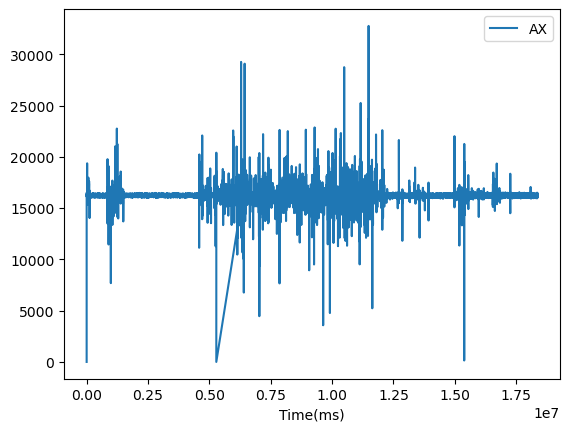

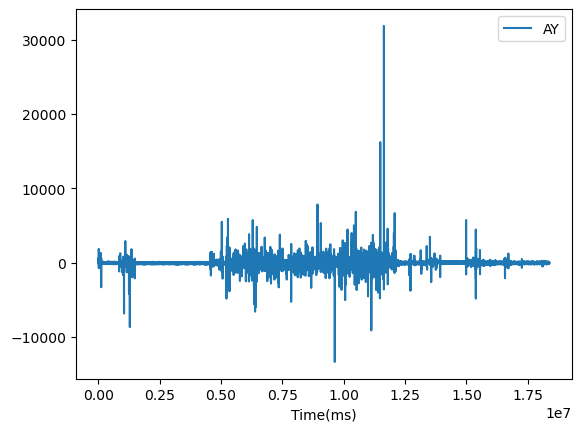

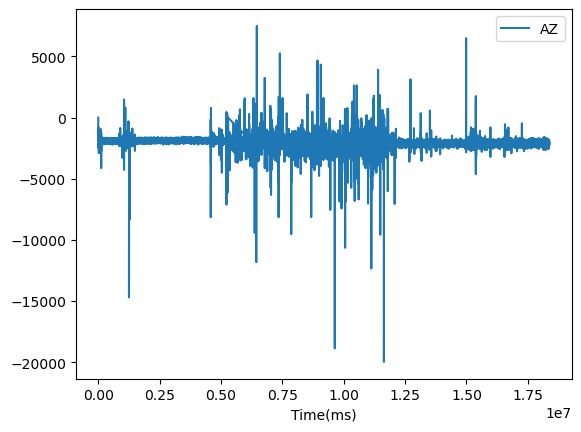

In [9]:
# plot raw vibrations data
print(df[["AX", "AY", "AZ"]])
df.plot(x = 'Time(ms)', y = 'AX')
df.plot(x = 'Time(ms)', y = 'AY')
df.plot(x = 'Time(ms)', y = 'AZ')
plt.show()

In [10]:
# get default AX, AY and AZ (i.e., what value corresponds to no acceleration)
default_AX = df['AX'].value_counts().idxmax()
default_AY = df['AY'].value_counts().idxmax()
default_AZ = df['AZ'].value_counts().idxmax()
print(default_AX)
print(default_AY)
print(default_AZ)


16240
-80
-2116


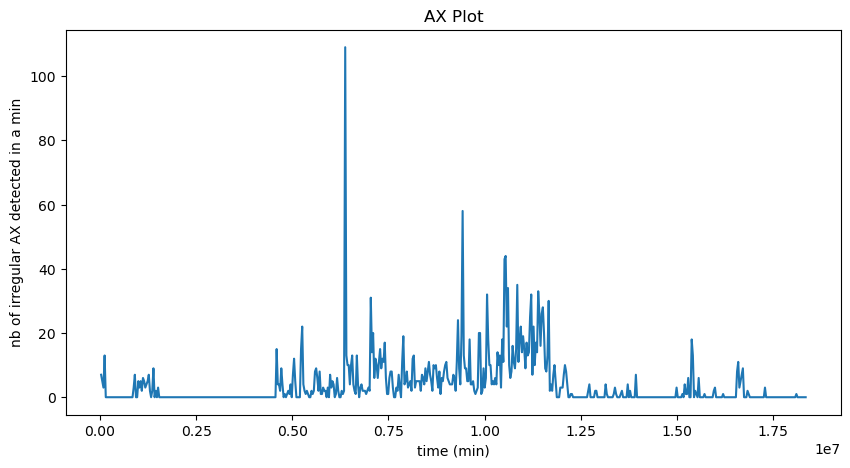

In [11]:
# graph the frequency of vibrations (i.e., count how many times the acceleration deviates from the default value)
# AX

count_AX = []
time_list = []
start_index = 0
start_time = df.loc[start_index, "AX"]

# convert the "Time(ms)" column to a numpy array for speed
AX_values = df["AX"].values

# count how many vibrations in a given interval (i.e., how many times the acceleration detected is very large)
for row in range(len(df)):
    end_time = times[row]
    
    if end_time - start_time > 30000:                   # time interval: 5 seconds  
        window_AX = AX_values[start_index:row+1]
        counter = (window_AX < (default_AX-500)).sum()
        counter = counter + (window_AX > (default_AX+500)).sum()
        count_AX.append(counter)
        time_list.append(end_time)
        
        start_index = row+2
        start_time = times[start_index]
        
plt.figure(figsize=(10, 5))  # Increase width to 10 inches
plt.plot(time_list,count_AX)

# Add labels and title
plt.xlabel("time (min)")
plt.ylabel("nb of irregular AX detected in a min")
plt.title("AX Plot")

plt.show()

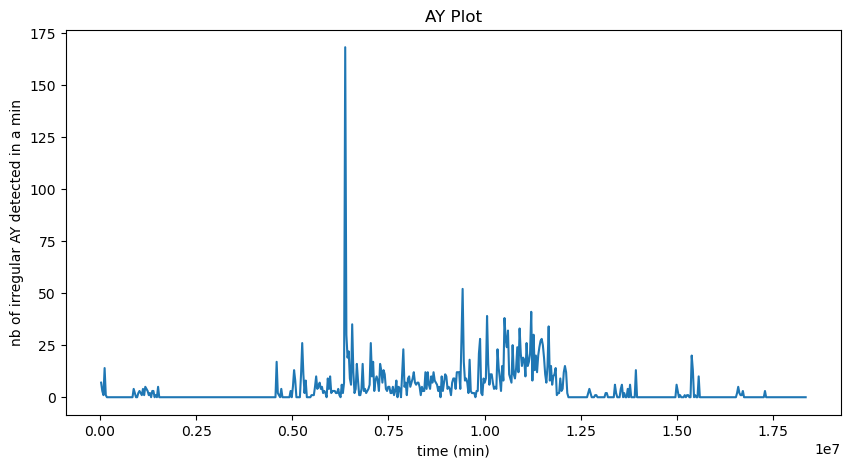

In [12]:
# same for AY

# graph the frequency of vibrations (i.e., count how many times the acceleration deviates from the default value)
# AY

count_AY = []
time_list = []
start_index = 0
start_time = df.loc[start_index, "AY"]

# convert the "Time(ms)" column to a numpy array for speed
AY_values = df["AY"].values

# count how many vibrations in a given interval (i.e., how many times the acceleration detected is very large)
for row in range(len(df)):
    end_time = times[row]
    
    if end_time - start_time > 30000:                   # time interval: 5 seconds
        window_AY = AY_values[start_index:row+1]
        counter = (window_AY < (default_AY-500)).sum()
        counter = counter + (window_AY > (default_AY+500)).sum()
        count_AY.append(counter)
        time_list.append(end_time)
        
        start_index = row+2
        start_time = times[start_index]
        
plt.figure(figsize=(10, 5))  # size of plot
plt.plot(time_list,count_AY)

# add labels and title
plt.xlabel("time (min)")
plt.ylabel("nb of irregular AY detected in a min")
plt.title("AY Plot")

plt.show()

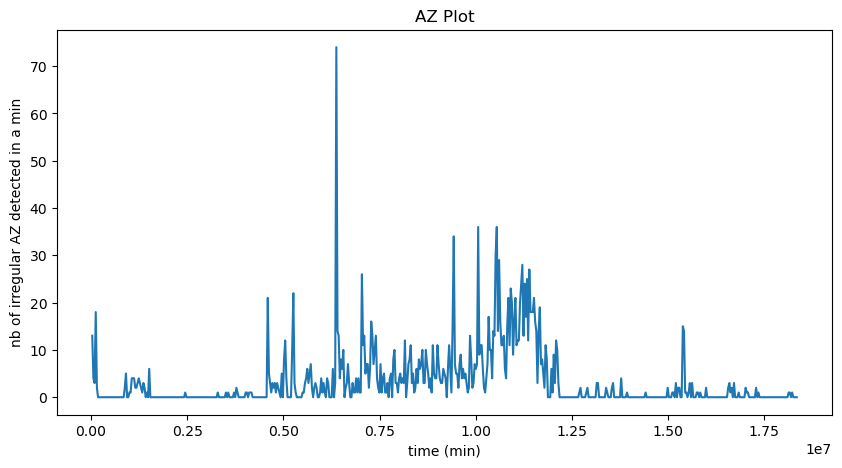

In [13]:
# same for AZ

# graph the frequency of vibrations (i.e., count how many times the acceleration deviates from the default value)
# AZ

count_AZ = []
time_list = []
start_index = 0
start_time = df.loc[start_index, "AZ"]

# Convert the "Time(ms)" column to a numpy array for speed
AZ_values = df["AZ"].values

for row in range(len(df)):
    end_time = times[row]
    
    if end_time - start_time > 30000:                   # time interval: 5 seconds
        window_AZ = AZ_values[start_index:row+1]
        counter = (window_AZ < (default_AZ-500)).sum()
        counter = counter + (window_AZ > (default_AZ+500)).sum()
        count_AZ.append(counter)
        time_list.append(end_time)
        
        start_index = row+2
        start_time = times[start_index]
        
plt.figure(figsize=(10, 5))  # size of plot
plt.plot(time_list,count_AZ)

# add labels and title
plt.xlabel("time (min)")
plt.ylabel("nb of irregular AZ detected in a min")
plt.title("AZ Plot")

plt.show()

Text(0, 0.5, 'nb of acceleration deviations')

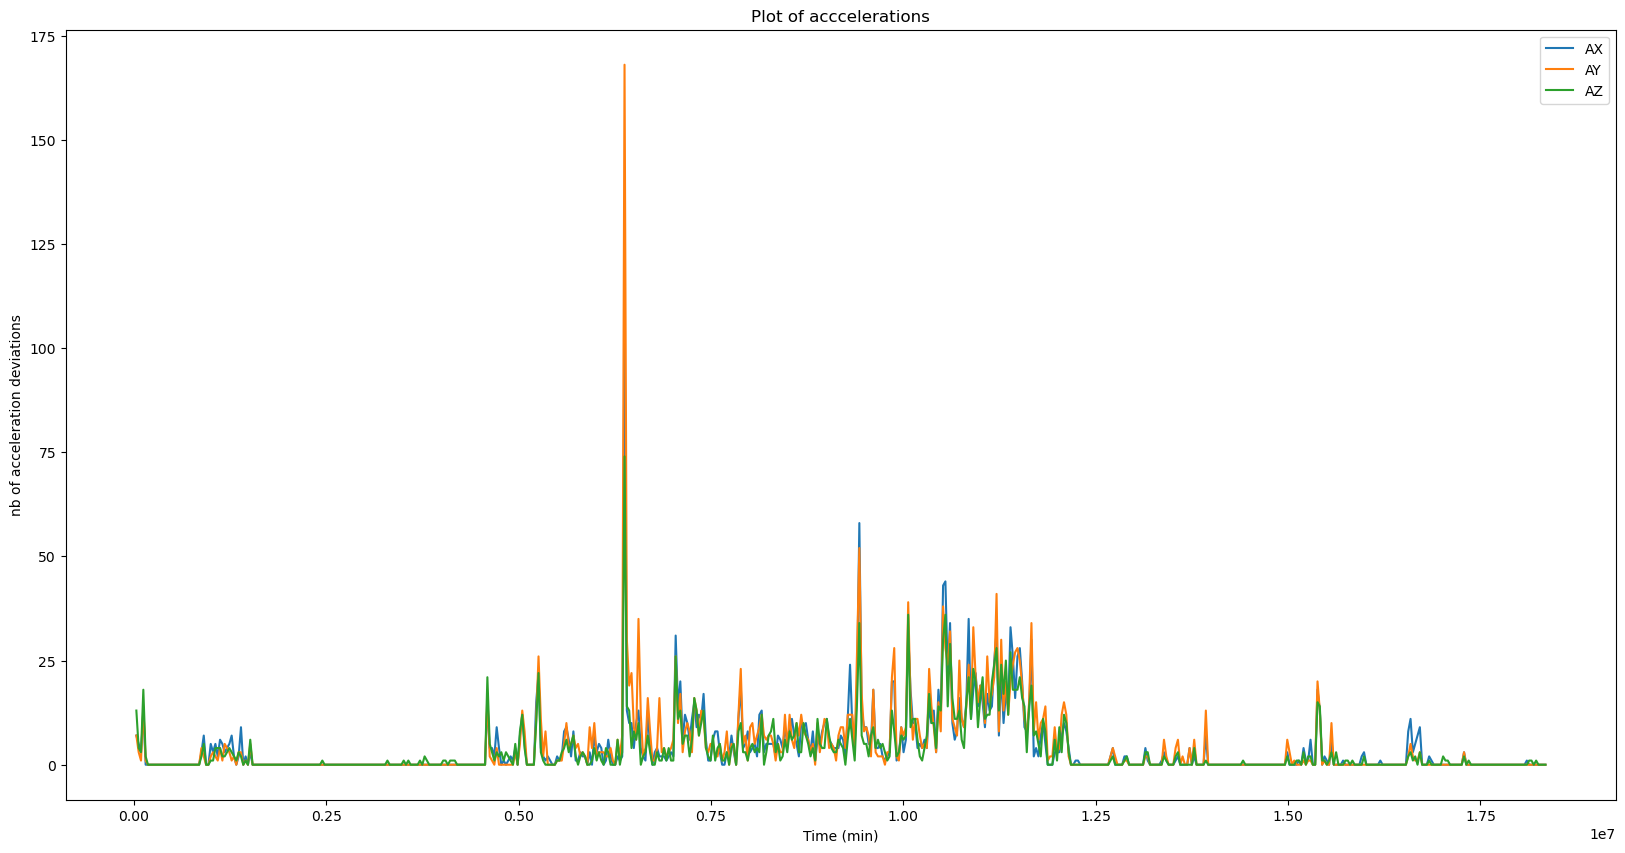

In [14]:
# PLOT ALL 3 ACCELERATIONS (in the same graph)
plt.figure(figsize=(20, 10))
plt.plot(time_list,count_AX,label = f"AX")
plt.plot(time_list,count_AY,label = f"AY")
plt.plot(time_list,count_AZ,label = f"AZ")


plt.legend()
plt.title("Plot of acccelerations")
plt.xlabel("Time (min)")
plt.ylabel("nb of acceleration deviations")